In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
data = pd.read_csv('concrete.csv')

In [3]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
data.shape

(1030, 9)

# Data Preprocessing

In [5]:
data.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
strength                                                 0
dtype: int64

No Null Values

In [6]:
data_copy = data.copy()

In [7]:
# Renaming the columns Name
data_copy = data_copy.rename(columns={
    'Cement (component 1)(kg in a m^3 mixture)' : 'Cement',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)' : 'Blast_Furnace_Slag',
    'Fly Ash (component 3)(kg in a m^3 mixture)' : 'Fly_Ash',
    'Water  (component 4)(kg in a m^3 mixture)' : 'Water',
    'Superplasticizer (component 5)(kg in a m^3 mixture)' : 'Superplasticizer',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)' : 'Coarse_Aggregate',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)' : 'Fine_Aggregate',
    'Age (day)' : 'Age_day'
})

In [8]:
data_copy.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age_day,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [9]:
data_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast_Furnace_Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly_Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse_Aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine_Aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age_day,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [10]:
data_copy.duplicated().value_counts()

False    1005
True       25
Name: count, dtype: int64

There are 25 duplicate rows exist in the dataset

In [11]:
data_copy = data_copy.drop_duplicates(keep='last') # Keeping the last one and deleteing 24

In [12]:
data_copy.shape

(1005, 9)

# Multivariate Analysis

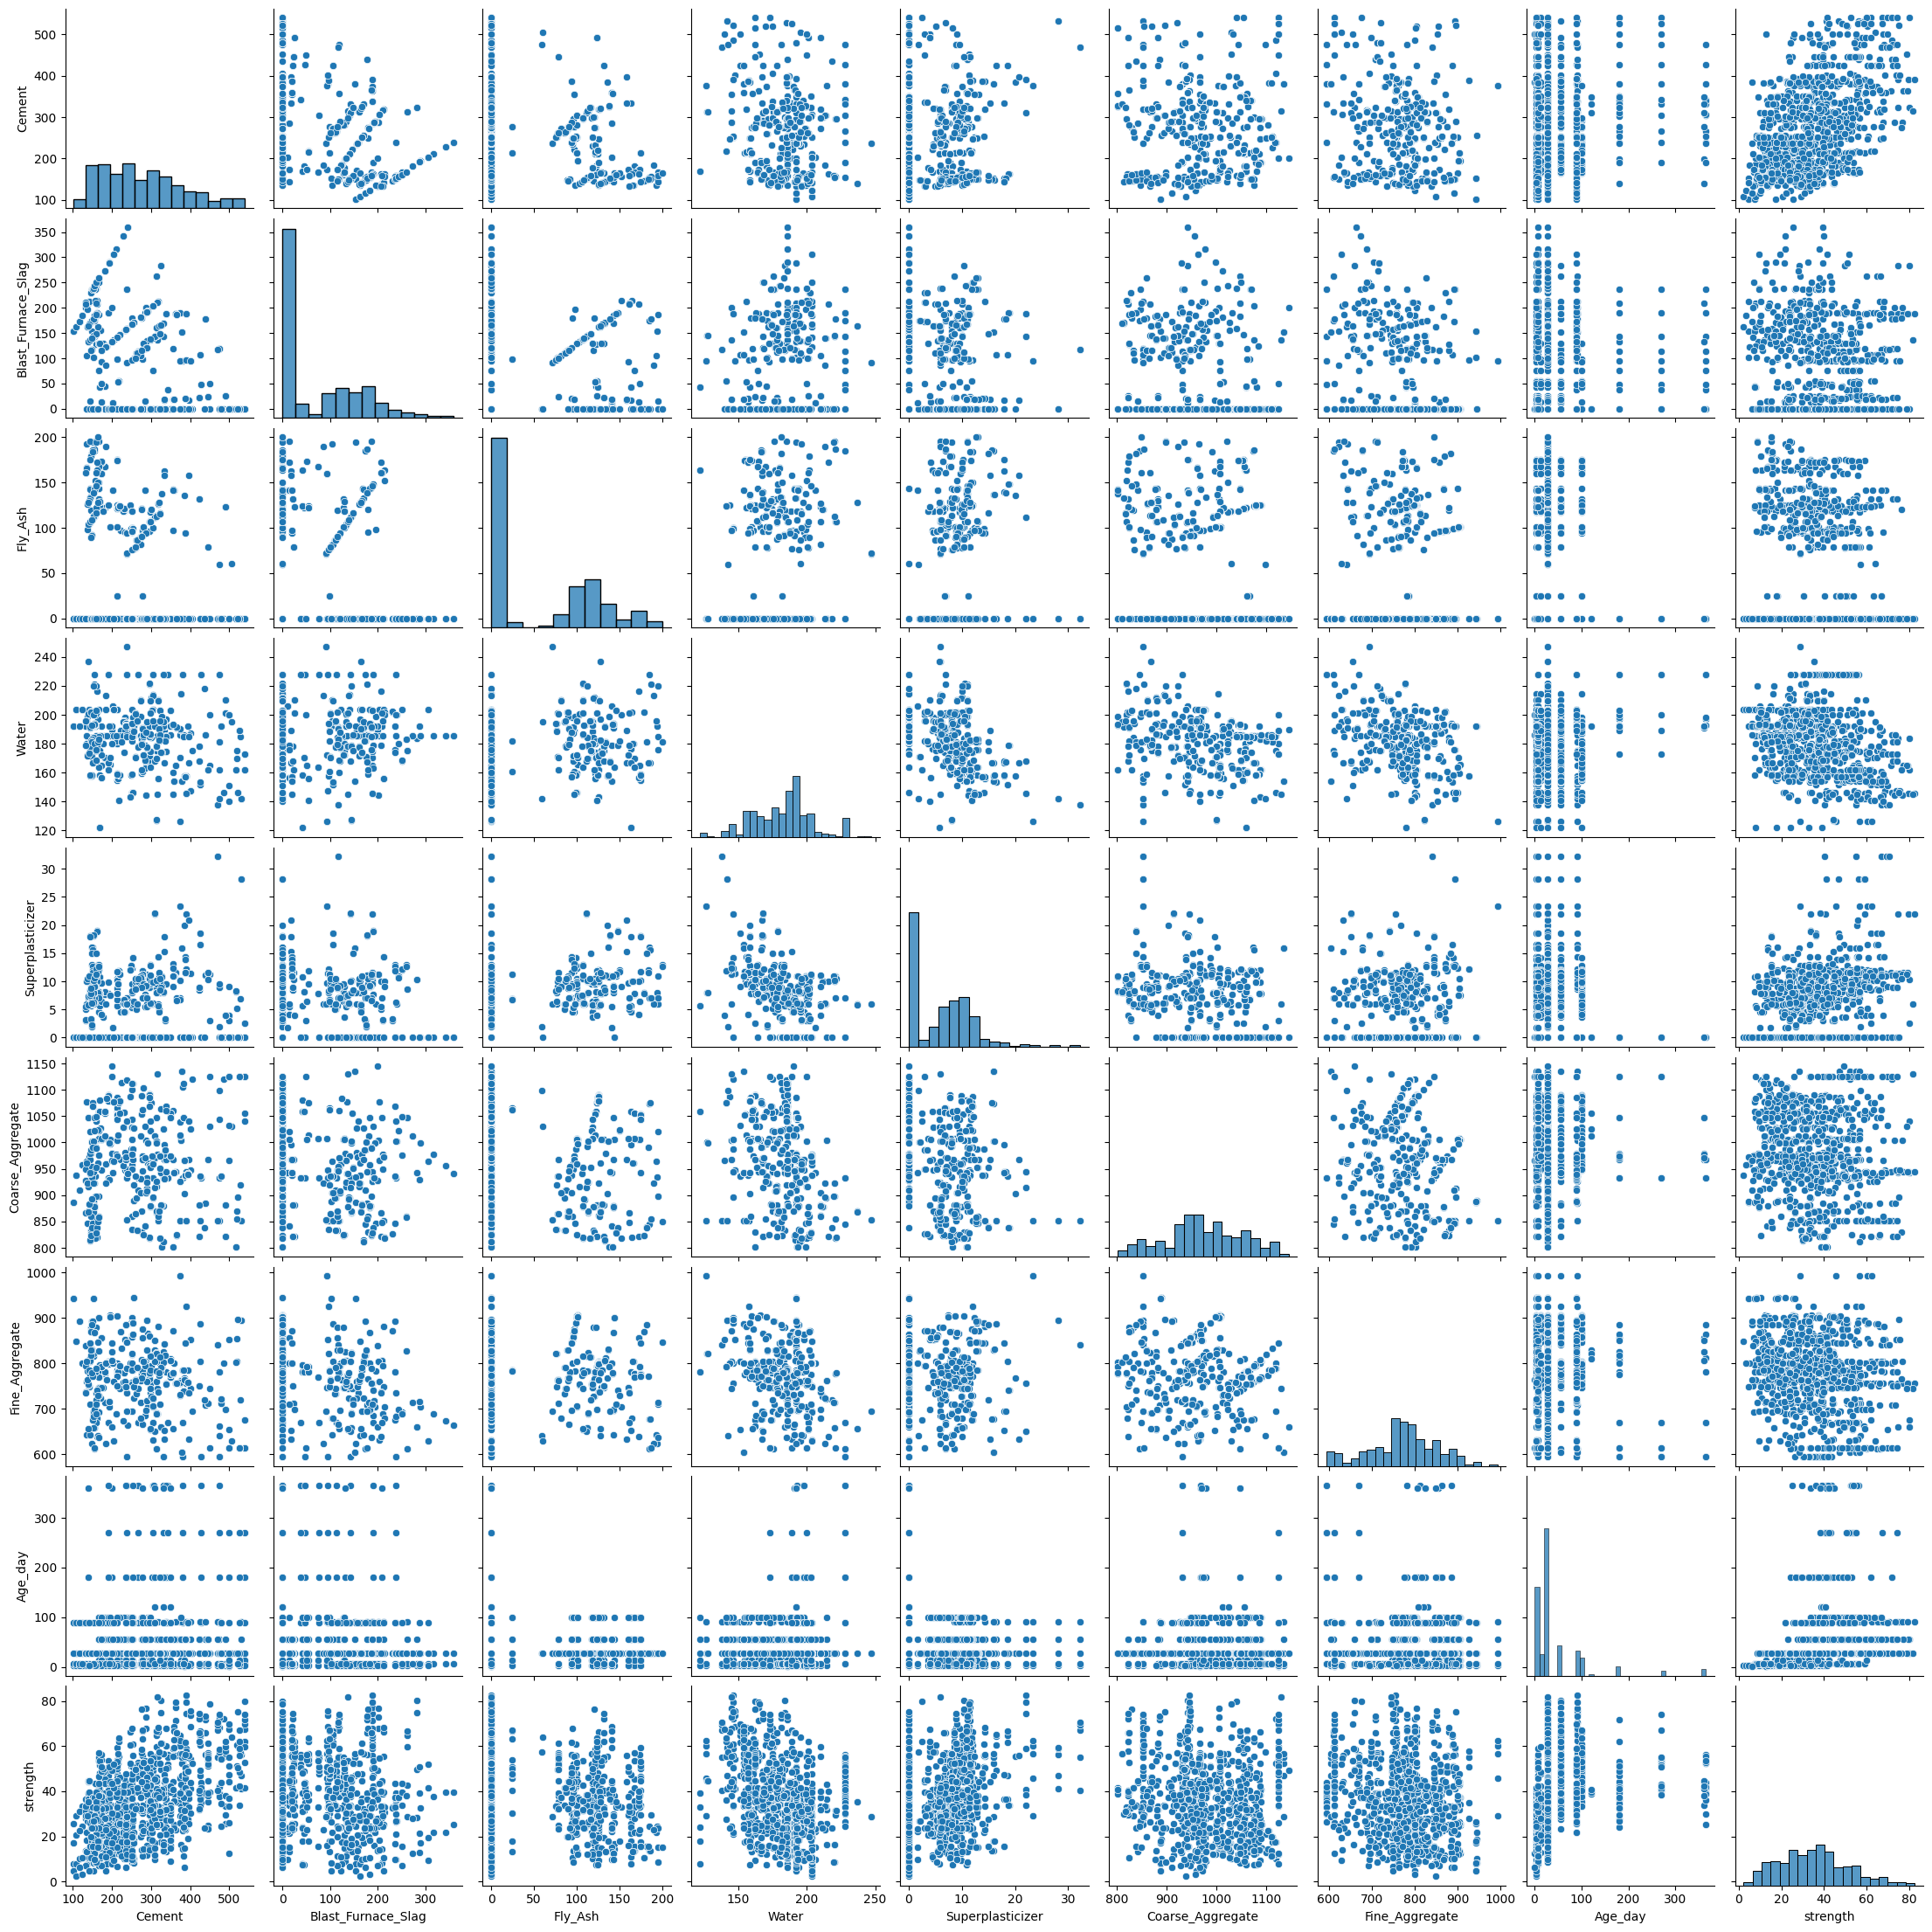

In [13]:
sns.pairplot(data_copy)
plt.show()

So we can see here there are no linear relationships between the columns except Cement and strenght

Lets Find out the pearson correlation coefficients between the features

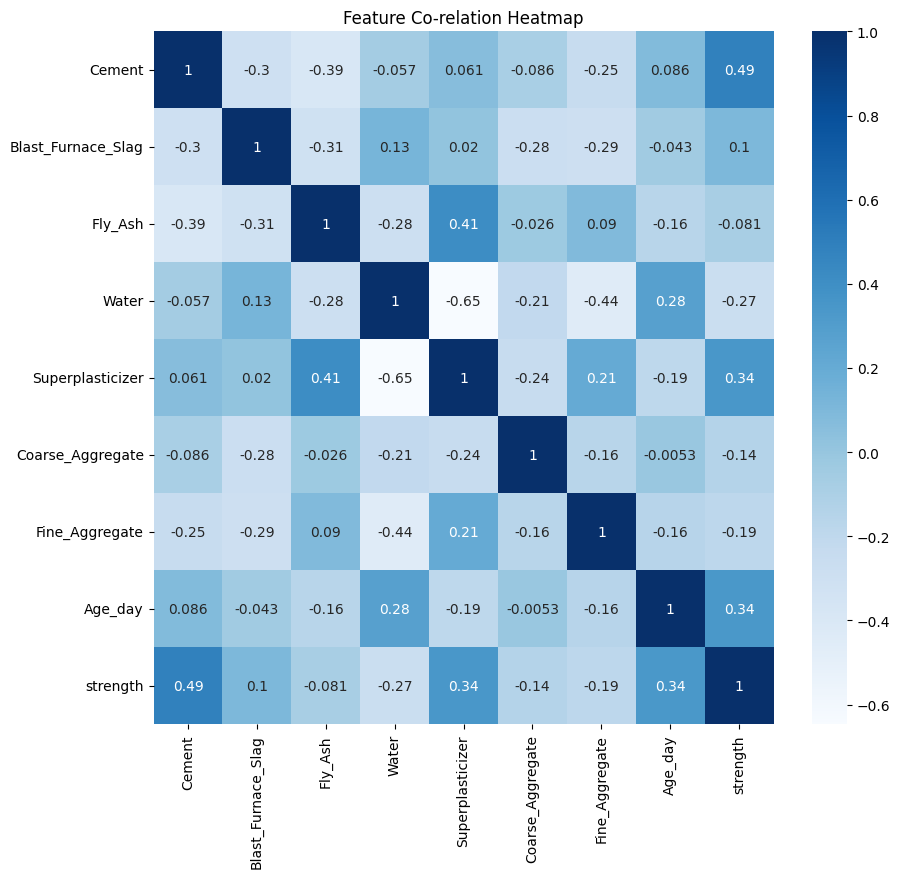

In [26]:
corr = data_copy.corr()
plt.figure(figsize=(10,9))
sns.heatmap(corr,annot=True,cmap='Blues')
plt.title("Feature Co-relation Heatmap")
plt.show()

# Observations

There are no relations are highly co-related except cement and strength and also Superplasticizer and age has a strong relation with strength

# Features in Data

In [28]:
data_copy.columns

Index(['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age_day', 'strength'],
      dtype='object')

Text(0.5, 1.0, 'Compressive Strength Distribution')

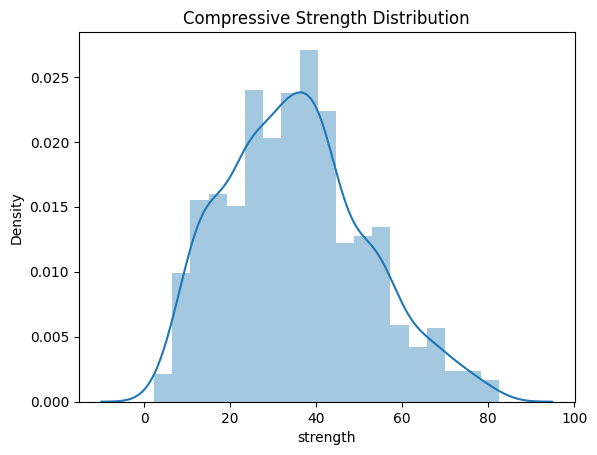

In [30]:
ax = sns.distplot(data_copy['strength'])
ax.set_title('Compressive Strength Distribution')

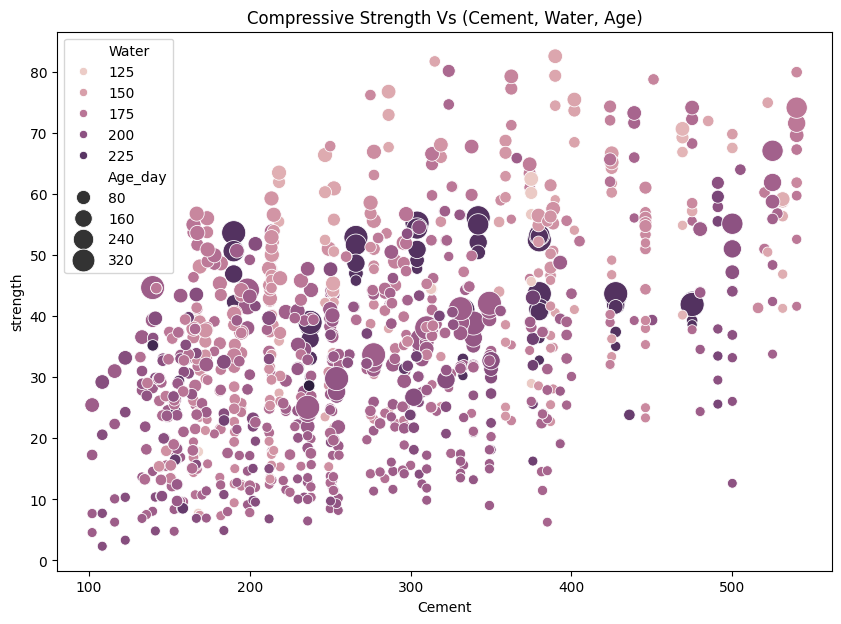

In [31]:
fig,ax = plt.subplots(figsize = (10,7))
sns.scatterplot(y='strength',x='Cement',hue='Water',size='Age_day',data=data_copy,ax=ax,sizes = (50,300))
plt.title('Compressive Strength Vs (Cement, Water, Age)')
plt.show()

# Oberservations from Compressive Strength Vs (Cement, Water, Age)

1) Strength increases with amount of cement increases
2) cement with higher age need more cement for strength
3) cement with lower water increases the strength

# Splitting the dataset

In [14]:
x = data_copy.drop('strength',axis=1)
y = data_copy.strength

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((804, 8), (201, 8))

# Scaling

In [32]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_val_scaled = scaler.transform(x_test)

# Model Building & Evaluation

# Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)

LinearRegression()

In [18]:
y_pred_lr = reg.predict(X_val_scaled)

In [19]:
print('Linear Regrassion')
print('MSE: {}'.format(mean_squared_error(y_test,y_pred_lr)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test,y_pred_lr))))
print('MAE: {}'.format(mean_absolute_error(y_test,y_pred_lr)))
print('R-squared: {}'.format(r2_score(y_test,y_pred_lr)))

Linear Regrassion
MSE: 120.83539666413648
RMSE: 10.992515483916158
MAE: 8.750486830262307
R-squared: 0.5916325552552691


# Gradient Boosting regressor

In [20]:
gb_regressor = GradientBoostingRegressor()

# Hyperparameter Tuning

In [21]:
# Define hyperparameters grid
# Using grid search since dataset is quite small and need a high precision result
params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01]
}

In [22]:
# Hyperparameter tuning
grid_search = GridSearchCV(gb_regressor, params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
best_gb_model = grid_search.best_estimator_

In [23]:
y_pred_gb = best_gb_model.predict(X_val_scaled)
print('Gradient Boosting Regressor')
print('MSE: {}'.format(mean_squared_error(y_test,y_pred_gb)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test,y_pred_gb))))
print('MAE: {}'.format(mean_absolute_error(y_test,y_pred_gb)))
print('R-squared: {}'.format(r2_score(y_test,y_pred_gb)))

Gradient Boosting Regressor
MSE: 19.25584522596171
RMSE: 4.388148268456948
MAE: 2.6542948017376946
R-squared: 0.9349241983027324


# Random Forest Regressor

In [24]:
rgr = RandomForestRegressor()
rgr.fit(X_train_scaled,y_train)
cv = KFold(n_splits=4,random_state=42,shuffle=True)
scores = cross_val_score(rgr,X_train_scaled,y_train,cv=cv,n_jobs=-1)
y_pred_rf = rgr.predict(X_val_scaled)

In [25]:
print('Random Forest Regressor')
print('MSE: {}'.format(mean_squared_error(y_test,y_pred_rf)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test,y_pred_rf))))
print('MAE: {}'.format(mean_absolute_error(y_test,y_pred_rf)))
print('R-squared: {}'.format(r2_score(y_test,y_pred_rf)))

Random Forest Regressor
MSE: 27.576100677115672
RMSE: 5.2512951428305445
MAE: 3.5070707746979406
R-squared: 0.9068056043144562


# Plotting Predictions & Comparing the performances 

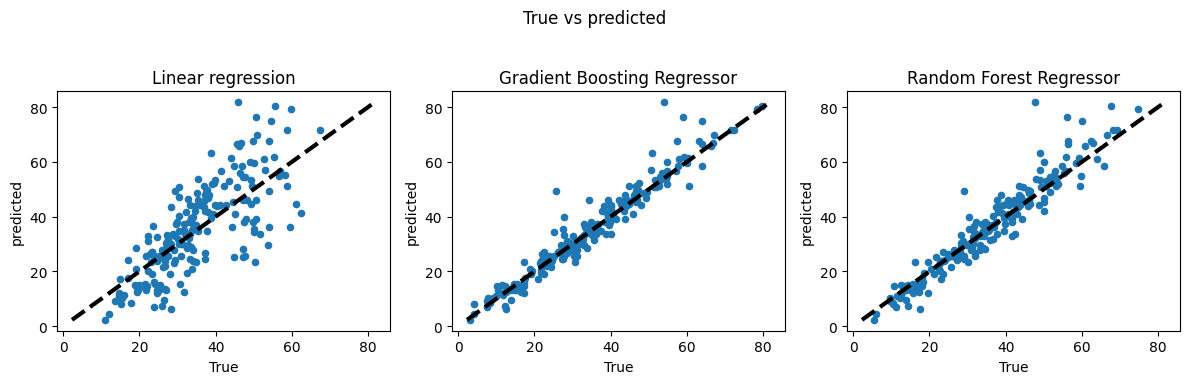

In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (12, 4))

ax1.scatter(y_pred_lr, y_test, s=20)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 3)
ax1.set_xlabel('True')
ax1.set_ylabel('predicted')
ax1.set_title('Linear regression')

ax2.scatter(y_pred_gb, y_test, s=20)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 3)
ax2.set_xlabel('True')
ax2.set_ylabel('predicted')
ax2.set_title('Gradient Boosting Regressor')


ax3.scatter(y_pred_rf, y_test, s=20)
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 3)
ax3.set_xlabel('True')
ax3.set_ylabel('predicted')
ax3.set_title('Random Forest Regressor')

fig.suptitle('True vs predicted')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Looking at the graphs between predicted and true values of the target variable, we can conclude that Gradient Boosting Regressor and Random Forest Regressor perform well as the predictions are closer to the actual values.